**ANÁLISE DE DADOS SOBRE A PANDEMIA DE COVID-19**

In [ ]:
# Importação de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [190]:
data = pd.read_csv('full_data.csv', parse_dates=['date']) # Tabela de dados de casos e mortes
print(data.dtypes, data.shape)

date               datetime64[ns]
location                   object
new_cases                 float64
new_deaths                float64
total_cases               float64
total_deaths              float64
weekly_cases              float64
weekly_deaths             float64
biweekly_cases            float64
biweekly_deaths           float64
dtype: object (380627, 10)


In [191]:
data = data[['location','date','total_cases','total_deaths']].dropna() #Eliminando colunas desnecessárias
data.head()

,location,date,total_cases,total_deaths
84,Afghanistan,2020-03-29,91.0,2.0
85,Afghanistan,2020-03-30,91.0,2.0
86,Afghanistan,2020-03-31,91.0,2.0
87,Afghanistan,2020-04-01,91.0,2.0
88,Afghanistan,2020-04-02,91.0,2.0


In [192]:
data = data.loc[data['location'] == 'Brazil'] #Pegando dados do Brasil
data = data.drop('location', axis = 1)
data = data.groupby('date').mean()
data.head()

,total_cases,total_deaths
date,,
2020-03-22,904.0,11.0
2020-03-23,904.0,11.0
2020-03-24,904.0,11.0
2020-03-25,904.0,11.0
2020-03-26,904.0,11.0


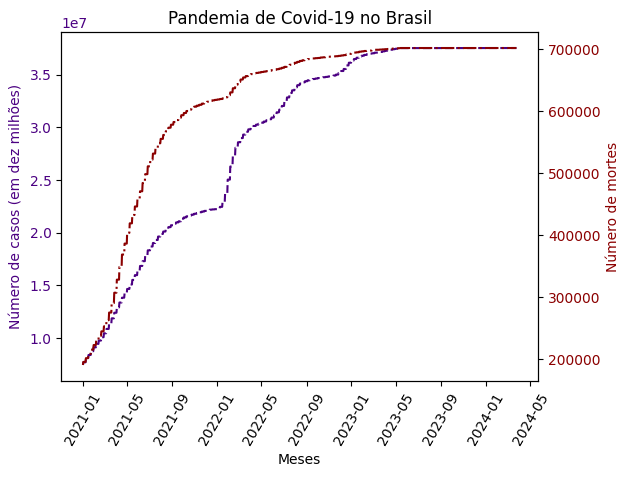

In [220]:
fig, casos = plt.subplots() #Gráfico 1

plt.xticks(rotation=60)
casos.set_xlabel('Meses')
casos.set_ylabel('Número de casos (em dez milhões)', color = 'indigo')
casos.plot(data['total_cases'], color = 'indigo', linestyle='--')
casos.tick_params(axis='y', labelcolor = 'indigo')

mortes = casos.twinx()

mortes.set_ylabel('Número de mortes', color='darkred') 
mortes.plot(data['total_deaths'], color='darkred', linestyle='-.')
mortes.tick_params(axis='y', labelcolor='darkred')

fig.tight_layout() 
plt.title("Pandemia de Covid-19 no Brasil")
plt.show()

In [194]:
vacinacao_br = pd.read_csv('Brazil.csv', parse_dates=['date']) # Tabela de dados de vacinação

print(vacinacao_br.dtypes, vacinacao_br.shape)

location                           object
date                       datetime64[ns]
vaccine                            object
source_url                         object
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
total_boosters                    float64
dtype: object (700, 8)


In [195]:
vacinacao_br = vacinacao_br.drop('source_url', axis=1) # Eliminando coluna desnecessária
vacinacao_br.head()

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Brazil,2021-01-17,Sinovac,112.0,112.0,0.0,0.0
1,Brazil,2021-01-18,Sinovac,1109.0,1109.0,0.0,0.0
2,Brazil,2021-01-19,Sinovac,13527.0,13527.0,0.0,0.0
3,Brazil,2021-01-20,Sinovac,105824.0,105824.0,0.0,0.0
4,Brazil,2021-01-21,Sinovac,193699.0,193699.0,0.0,0.0


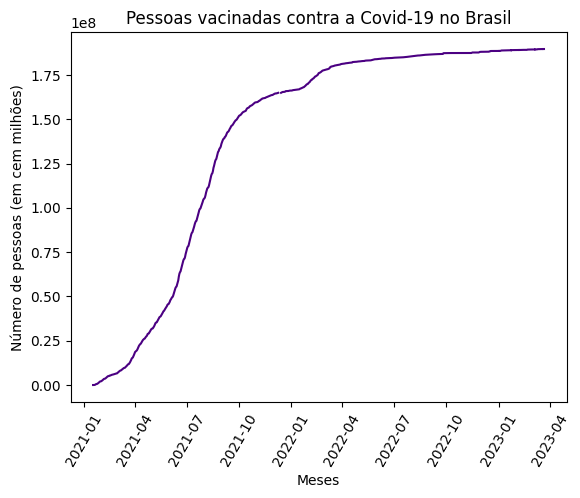

In [196]:
plt.plot(vacinacao_br['date'], vacinacao_br['people_vaccinated'], color ='indigo') # Gráfico 2
plt.title("Pessoas vacinadas contra a Covid-19 no Brasil")
plt.xticks(rotation =60)
plt.xlabel("Meses")
plt.ylabel("Número de pessoas (em cem milhões)")

plt.show()

In [197]:
data = data.loc[data.index > '2021-01-01'] # Juntando os gráficos e selecionando o período específico
comparacao = pd.merge(data, vacinacao_br, how='inner', on='date')
comparacao = comparacao.set_index('date')
comparacao = comparacao.drop(['vaccine','total_vaccinations','people_fully_vaccinated','total_boosters','location'], axis=1) # Eliminando colunas desnecessárias
comparacao.head()

,total_cases,total_deaths,people_vaccinated
date,,,
2021-01-17,8393492.0,208246.0,112.0
2021-01-18,8393492.0,208246.0,1109.0
2021-01-19,8393492.0,208246.0,13527.0
2021-01-20,8393492.0,208246.0,105824.0
2021-01-21,8393492.0,208246.0,193699.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


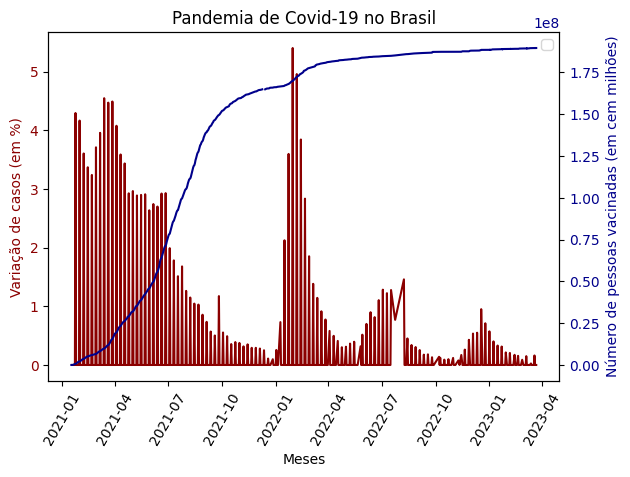

In [198]:
grafico, variacao = plt.subplots() #Gráfico 3

plt.xticks(rotation=60)
variacao.set_xlabel('Meses')
variacao.set_ylabel('Variação de casos (em %)', color='darkred')
variacao.plot(comparacao['total_cases'].pct_change()*100, color='darkred')
variacao.tick_params(axis='y', labelcolor = 'darkred')

vacinacao = variacao.twinx()
vacinacao.set_ylabel('Número de pessoas vacinadas (em cem milhões)', color='darkblue')
vacinacao.plot(comparacao['people_vaccinated'], color='darkblue')
vacinacao.tick_params(axis='y', labelcolor='darkblue')

grafico.tight_layout() 
plt.title("Pandemia de Covid-19 no Brasil")
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


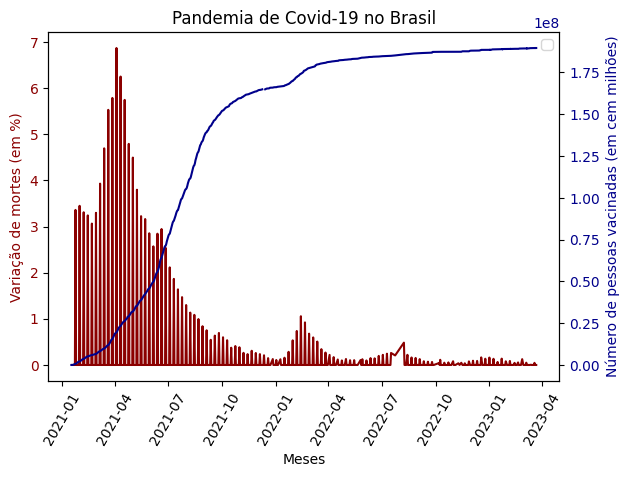

In [199]:
grafico, variacao = plt.subplots() #Gráfico 4

plt.xticks(rotation=60)
variacao.set_xlabel('Meses')
variacao.set_ylabel('Variação de mortes (em %)', color='darkred')
variacao.plot(comparacao['total_deaths'].pct_change()*100, color='darkred')
variacao.tick_params(axis='y', labelcolor = 'darkred')

vacinacao = variacao.twinx()
vacinacao.set_ylabel('Número de pessoas vacinadas (em cem milhões)', color='darkblue')
vacinacao.plot(comparacao['people_vaccinated'], color='darkblue')
vacinacao.tick_params(axis='y', labelcolor='darkblue')

grafico.tight_layout() 
plt.title("Pandemia de Covid-19 no Brasil")
plt.legend()

plt.show()

**Conclusão:**
O gráfico 1 demonstra o total de casos e mortes de Covid-19 ao longo dos meses. É observável que por volta dos últimos meses o gráfico começa a crescer bem mais devagar, perdendo sua característica crescente bem expressiva, o que denota uma baixa no aumento de mortes e casos devido a pandemia. A principal questão é: Qual o motivo da estagnação de casos e mortes? Através dos gráficos 3 e 4, pode-se inferir que há uma grande influência com a taxa da vacinação. Com o aumento do total de pessoas vacinadas, a variação percentual de casos e mortes foi diminuindo bastante, e junto a análise do gráfico 1, é perceptível que essa variação pequena é algo bom, pois há um decaimento no número de casos e mortes, demonstrando o efeito positivo que a vacina trouxe, colaborando para o fim da pandemia.